### Enabling TensorFlow 2 version 

In [0]:
# Colab has two versions of TensorFlow installed: a 1.x version and a 2.x version. 
# Colab currently uses TF 1.x by default
# To enable TF2 execute the following code

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


### Mounting the Google Drive 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Make sure to check that your data is at correct location

In [0]:
!ls /content/gdrive/'My Drive'/'Colab Notebooks'/data.zip

'/content/gdrive/My Drive/Colab Notebooks/data.zip'


### Decompress the zip file stored in our Google drive 

In [0]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.zip"

Archive:  /content/gdrive/My Drive/Colab Notebooks/data.zip
  inflating: data.h5                 


### Loading the Train and the Test data 

In [0]:
import numpy as np
import h5py
  
def loadData():
    with h5py.File('data.h5','r') as hf:
      print('List of arrays in this file: \n', hf.keys())
      allTrain = hf.get('trainData')
      allTest = hf.get('testData')
      npTrain = np.array(allTrain)
      npTest = np.array(allTest)
        
    
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

X_train, y_train, X_test, y_test = loadData()

print('Shape of the feature training data: \n', X_train.shape)
print('Shape of the true training class labels: \n', y_train.shape)
print()
print('Shape of the feature test data: \n', X_test.shape)
print('Shape of the true test class labels: \n', y_test.shape)

List of arrays in this file: 
 <KeysViewHDF5 ['testData', 'trainData']>
Shape of the feature training data: 
 (200000, 784)
Shape of the true training class labels: 
 (200000,)

Shape of the feature test data: 
 (17000, 784)
Shape of the true test class labels: 
 (17000,)


### Beginning of our TensorFlow Keras Code 

In [0]:
# Importing the necessary libraries 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 
import matplotlib.pyplot as plt

### Architecture 1 - Creating the Benchmark Single Layer Softmax Model 

Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.7488 - accuracy: 0.8017 - val_loss: 0.6603 - val_accuracy: 0.8253
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.6520 - accuracy: 0.8285 - val_loss: 0.6467 - val_accuracy: 0.8255
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.6404 - accuracy: 0.8304 - val_loss: 0.6390 - val_accuracy: 0.8266
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.6344 - accuracy: 0.8322 - val_loss: 0.6347 - val_accuracy: 0.8291
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.6316 - accuracy: 0.8332 - val_loss: 0.6355 - val_accuracy: 0.8317
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.6284 - accuracy: 0.8342 - val_loss: 0.6340 - val_accuracy: 0.8311
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 0.6271 - accuracy: 0.8341 - val_loss: 0.6320 - val_accuracy: 0.8313
Epoch 

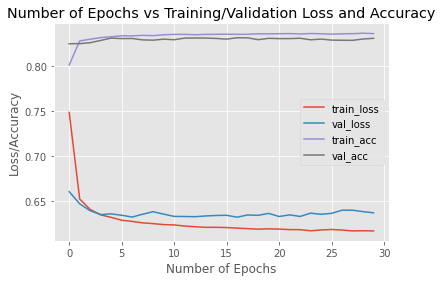

532/532 [==============================] - 1s 2ms/step - loss: 0.5489 - accuracy: 0.8552
The test set loss and accuracy is 
 [0.5488766431808472, 0.8551764488220215]


In [0]:
#------------------------------------- SPECIFYING THE NETWORK ARCHITECTURE---------------------------------------------------------

# Create an instance of Sequential model 
# Adding the single SoftMax layer of 10 neurons as it is a 10-class classification 
# Specifying the input shape as each image is constituted of 784 pixels/features
model= tf.keras.models.Sequential([layers.Dense(10, activation=tf.nn.softmax, input_shape= (784,))])

# Specifying the optimizer which is responsible for updating the weights 
# Specifying the loss function that we need to minimize in order to get the optimal weights 
# Specifying the appropriate metrics for recording the performance of the model with each iteration 
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

# Training process of our Softmax NN Model 
history= model.fit(X_train, y_train, batch_size= 256, epochs=30, validation_split=0.1)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

plt.style.use("ggplot")
plt.figure()

upper_limit= 30
plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

# Get the predictions from our basic model 
results= model.evaluate(X_test, y_test)
# Print the test set loss and the accuracy 
print("The test set loss and accuracy is \n",results)

### Architecture 2 - Two layer Softmax model with incoming ReLu activations neurons

Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.5300 - accuracy: 0.8470 - val_loss: 0.4498 - val_accuracy: 0.8706
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4095 - accuracy: 0.8809 - val_loss: 0.4177 - val_accuracy: 0.8792
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3679 - accuracy: 0.8927 - val_loss: 0.3944 - val_accuracy: 0.8881
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3412 - accuracy: 0.9005 - val_loss: 0.3975 - val_accuracy: 0.8879
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3209 - accuracy: 0.9060 - val_loss: 0.3894 - val_accuracy: 0.8903
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3050 - accuracy: 0.9104 - val_loss: 0.3808 - val_accuracy: 0.8910
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2904 - accuracy: 0.9144 - val_loss: 0.3886 - val_accuracy: 0.8913
Epoch 

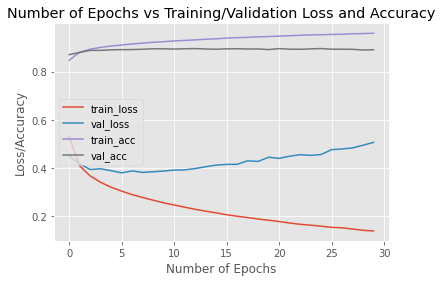

532/532 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.9120
The test set loss and accuracy is 
 [0.40713396668434143, 0.9120000004768372]


In [0]:
#------------------------------------- SPECIFYING THE NETWORK ARCHITECTURE---------------------------------------------------------

# Create an instance of Sequential model 
# Specifying the input shape as each image is constituted of 784 pixels/features
# Adding the ReLu activation layer with 200 neurons 
# Adding the single SoftMax layer of 10 neurons as it is a 10-class classification 

model= tf.keras.models.Sequential([layers.Dense(200, activation= tf.nn.relu, input_shape= (784,)),
                                   layers.Dense(10, activation=tf.nn.softmax)])

# Specifying the optimizer which is responsible for updating the weights 
# Specifying the loss function that we need to minimize in order to get the optimal weights 
# Specifying the appropriate metrics for recording the performance of the model with each iteration 
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

# Training process of our Softmax NN Model 
history= model.fit(X_train, y_train, batch_size= 256, epochs=30, validation_split=0.1)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

plt.style.use("ggplot")
plt.figure()

upper_limit= 30
plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

# Get the predictions from our basic model 
results= model.evaluate(X_test, y_test)
# Print the test set loss and the accuracy 
print("The test set loss and accuracy is \n",results)

### Architecture 3 - Three layer SoftMax Model 

Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.8584 - val_loss: 0.3954 - val_accuracy: 0.8812
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3515 - accuracy: 0.8929 - val_loss: 0.3701 - val_accuracy: 0.8905
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3058 - accuracy: 0.9055 - val_loss: 0.3538 - val_accuracy: 0.8971
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2743 - accuracy: 0.9149 - val_loss: 0.3326 - val_accuracy: 0.9025
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2484 - accuracy: 0.9227 - val_loss: 0.3450 - val_accuracy: 0.8985
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2260 - accuracy: 0.9291 - val_loss: 0.3432 - val_accuracy: 0.9031
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2042 - accuracy: 0.9351 - val_loss: 0.3633 - val_accuracy: 0.9032
Epoch 

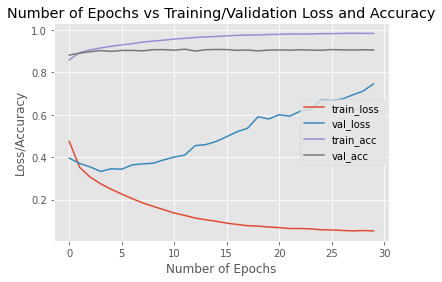

532/532 [==============================] - 1s 2ms/step - loss: 0.6061 - accuracy: 0.9211
The test set loss and accuracy is 
 [0.6061061024665833, 0.9211176633834839]


In [0]:
#------------------------------------- SPECIFYING THE NETWORK ARCHITECTURE---------------------------------------------------------

# Create an instance of Sequential model 
# Specifying the input shape as each image is constituted of 784 pixels/features
# Adding the ReLU activation layer with 400 neurons 
# Adding the ReLU activation layer with 200 neurons 
# Adding the single SoftMax layer of 10 neurons as it is a 10-class classification 

model= tf.keras.models.Sequential([layers.Dense(400, activation= tf.nn.relu, input_shape= (784,)),
                                   layers.Dense(200, activation= tf.nn.relu),
                                   layers.Dense(10, activation=tf.nn.softmax)])

# Specifying the optimizer which is responsible for updating the weights 
# Specifying the loss function that we need to minimize in order to get the optimal weights 
# Specifying the appropriate metrics for recording the performance of the model with each iteration 
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

# Training process of our Softmax NN Model 
history= model.fit(X_train, y_train, batch_size= 256, epochs=30, validation_split=0.1)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

plt.style.use("ggplot")
plt.figure()

upper_limit= 30
plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

# Get the predictions from our basic model 
results= model.evaluate(X_test, y_test)
# Print the test set loss and the accuracy 
print("The test set loss and accuracy is \n",results)

### Architecture 4 - Four Layer SoftMax Model 


Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4594 - accuracy: 0.8607 - val_loss: 0.3883 - val_accuracy: 0.8806
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3399 - accuracy: 0.8948 - val_loss: 0.3519 - val_accuracy: 0.8941
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2921 - accuracy: 0.9082 - val_loss: 0.3464 - val_accuracy: 0.8979
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2588 - accuracy: 0.9182 - val_loss: 0.3296 - val_accuracy: 0.9013
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2295 - accuracy: 0.9267 - val_loss: 0.3362 - val_accuracy: 0.9043
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2051 - accuracy: 0.9339 - val_loss: 0.3492 - val_accuracy: 0.9058
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 0.1833 - accuracy: 0.9407 - val_loss: 0.3445 - val_accuracy: 0.9079
Epoch 

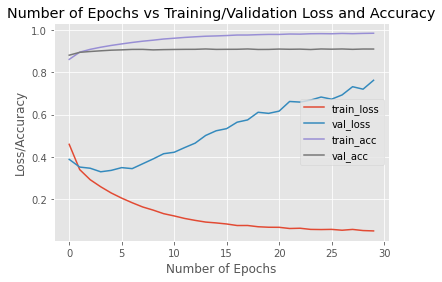

532/532 [==============================] - 1s 2ms/step - loss: 0.6006 - accuracy: 0.9278
The test set loss and accuracy is 
 [0.6006399989128113, 0.9277647137641907]


In [0]:
#------------------------------------- SPECIFYING THE NETWORK ARCHITECTURE---------------------------------------------------------

# Create an instance of Sequential model 
# Specifying the input shape as each image is constituted of 784 pixels/features
# Adding the ReLU activation layer with 600 neurons 
# Adding the ReLU activation layer with 400 neurons 
# Adding the ReLU activation layer with 200 neurons 
# Adding the single SoftMax layer of 10 neurons as it is a 10-class classification 

model= tf.keras.models.Sequential([layers.Dense(600, activation= tf.nn.relu, input_shape= (784,)),
                                   layers.Dense(400, activation= tf.nn.relu),
                                   layers.Dense(200, activation= tf.nn.relu),
                                   layers.Dense(10, activation=tf.nn.softmax)])

# Specifying the optimizer which is responsible for updating the weights 
# Specifying the loss function that we need to minimize in order to get the optimal weights 
# Specifying the appropriate metrics for recording the performance of the model with each iteration 
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

# Training process of our Softmax NN Model 
history= model.fit(X_train, y_train, batch_size= 256, epochs=30, validation_split=0.1)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

plt.style.use("ggplot")
plt.figure()

upper_limit= 30
plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

# Get the predictions from our basic model 
results= model.evaluate(X_test, y_test)
# Print the test set loss and the accuracy 
print("The test set loss and accuracy is \n",results)

### Application of Dropout Regularisation on Architecture 3  

Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.5259 - accuracy: 0.8422 - val_loss: 0.4146 - val_accuracy: 0.8751
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4065 - accuracy: 0.8757 - val_loss: 0.3803 - val_accuracy: 0.8853
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3685 - accuracy: 0.8865 - val_loss: 0.3566 - val_accuracy: 0.8923
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3442 - accuracy: 0.8933 - val_loss: 0.3478 - val_accuracy: 0.8947
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3271 - accuracy: 0.8974 - val_loss: 0.3366 - val_accuracy: 0.8989
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3113 - accuracy: 0.9025 - val_loss: 0.3301 - val_accuracy: 0.9016
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2988 - accuracy: 0.9055 - val_loss: 0.3274 - val_accuracy: 0.9027
Epoch 

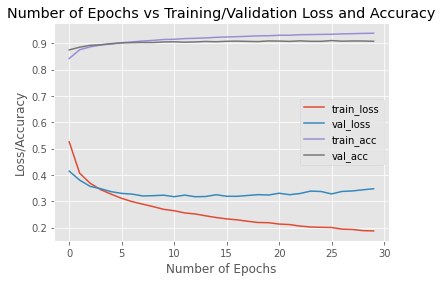

532/532 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.9272
The test set loss and accuracy is 
 [0.2724141478538513, 0.9272353053092957]


In [0]:
#------------------------------------- SPECIFYING THE NETWORK ARCHITECTURE---------------------------------------------------------

# Create an instance of Sequential model 
# Specifying the input shape as each image is constituted of 784 pixels/features
# Adding the ReLU activation layer with 400 neurons 
# Adding a Dropout layer with dropout probability 0.2 
# Adding the ReLU activation layer with 200 neurons 
# Adding a Dropout layer with dropout probability 0.2 
# Adding the single SoftMax layer of 10 neurons as it is a 10-class classification 

model= tf.keras.models.Sequential([layers.Dense(400, activation= tf.nn.relu, input_shape= (784,)),
                                   layers.Dropout(0.2),
                                   layers.Dense(200, activation= tf.nn.relu),
                                   layers.Dropout(0.2),
                                   layers.Dense(10, activation=tf.nn.softmax)])

# Specifying the optimizer which is responsible for updating the weights 
# Specifying the loss function that we need to minimize in order to get the optimal weights 
# Specifying the appropriate metrics for recording the performance of the model with each iteration 
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

# Training process of our Softmax NN Model 
history= model.fit(X_train, y_train, batch_size= 256, epochs=30, validation_split=0.1)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

plt.style.use("ggplot")
plt.figure()

upper_limit= 30
plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

# Get the predictions from our basic model 
results= model.evaluate(X_test, y_test)
# Print the test set loss and the accuracy 
print("The test set loss and accuracy is \n",results)

### Application of Dropout Regularisation on Architecture 4

Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.5150 - accuracy: 0.8435 - val_loss: 0.4083 - val_accuracy: 0.8763
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3987 - accuracy: 0.8766 - val_loss: 0.3601 - val_accuracy: 0.8910
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3607 - accuracy: 0.8884 - val_loss: 0.3469 - val_accuracy: 0.8946
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3351 - accuracy: 0.8956 - val_loss: 0.3302 - val_accuracy: 0.8989
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3144 - accuracy: 0.9007 - val_loss: 0.3328 - val_accuracy: 0.8981
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3010 - accuracy: 0.9049 - val_loss: 0.3222 - val_accuracy: 0.9025
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 0.2876 - accuracy: 0.9085 - val_loss: 0.3206 - val_accuracy: 0.9053
Epoch 

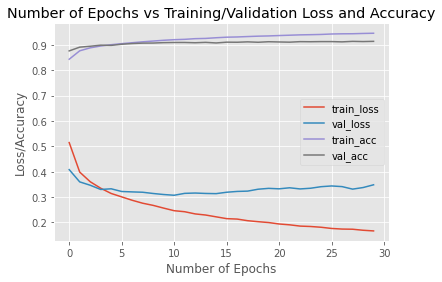

532/532 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.9315
The test set loss and accuracy is 
 [0.2704298496246338, 0.9314705729484558]


In [0]:
#------------------------------------- SPECIFYING THE NETWORK ARCHITECTURE---------------------------------------------------------

# Create an instance of Sequential model 
# Specifying the input shape as each image is constituted of 784 pixels/features
# Adding the ReLU activation layer with 600 neurons 
# Adding a Dropout layer with dropout probability 0.2 
# Adding the ReLU activation layer with 400 neurons 
# Adding a Dropout layer with dropout probability 0.2 
# Adding the ReLU activation layer with 200 neurons 
# Adding a Dropout layer with dropout probability 0.2 
# Adding the single SoftMax layer of 10 neurons as it is a 10-class classification 

model= tf.keras.models.Sequential([layers.Dense(600, activation= tf.nn.relu, input_shape= (784,)),
                                   layers.Dropout(0.2),
                                   layers.Dense(400, activation= tf.nn.relu),
                                   layers.Dropout(0.2),
                                   layers.Dense(200, activation= tf.nn.relu),
                                   layers.Dropout(0.2),
                                   layers.Dense(10, activation=tf.nn.softmax)])

# Specifying the optimizer which is responsible for updating the weights 
# Specifying the loss function that we need to minimize in order to get the optimal weights 
# Specifying the appropriate metrics for recording the performance of the model with each iteration 
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

# Training process of our Softmax NN Model 
history= model.fit(X_train, y_train, batch_size= 256, epochs=30, validation_split=0.1)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

plt.style.use("ggplot")
plt.figure()

upper_limit= 30
plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

# Get the predictions from our basic model 
results= model.evaluate(X_test, y_test)
# Print the test set loss and the accuracy 
print("The test set loss and accuracy is \n",results)

### Dropout to the Architecture 2 

Epoch 1/30
704/704 [==============================] - 2s 3ms/step - loss: 0.5649 - accuracy: 0.8376 - val_loss: 0.4614 - val_accuracy: 0.8676
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4587 - accuracy: 0.8675 - val_loss: 0.4279 - val_accuracy: 0.8783
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4262 - accuracy: 0.8770 - val_loss: 0.4118 - val_accuracy: 0.8809
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 0.4063 - accuracy: 0.8827 - val_loss: 0.3974 - val_accuracy: 0.8867
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3896 - accuracy: 0.8863 - val_loss: 0.3910 - val_accuracy: 0.8878
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3795 - accuracy: 0.8900 - val_loss: 0.3855 - val_accuracy: 0.8914
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 0.3687 - accuracy: 0.8933 - val_loss: 0.3834 - val_accuracy: 0.8913
Epoch 

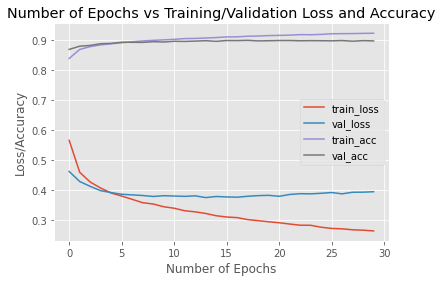

532/532 [==============================] - 1s 2ms/step - loss: 0.3081 - accuracy: 0.9188
The test set loss and accuracy is 
 [0.3081086277961731, 0.9187647104263306]


In [0]:
#------------------------------------- SPECIFYING THE NETWORK ARCHITECTURE---------------------------------------------------------

# Create an instance of Sequential model 
# Specifying the input shape as each image is constituted of 784 pixels/features
# Adding the ReLu activation layer with 200 neurons 
# Adding the single SoftMax layer of 10 neurons as it is a 10-class classification 

model= tf.keras.models.Sequential([layers.Dense(200, activation= tf.nn.relu, input_shape= (784,)),
                                   layers.Dropout(0.2),
                                   layers.Dense(10, activation=tf.nn.softmax)])

# Specifying the optimizer which is responsible for updating the weights 
# Specifying the loss function that we need to minimize in order to get the optimal weights 
# Specifying the appropriate metrics for recording the performance of the model with each iteration 
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

# Training process of our Softmax NN Model 
history= model.fit(X_train, y_train, batch_size= 256, epochs=30, validation_split=0.1)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

plt.style.use("ggplot")
plt.figure()

upper_limit= 30
plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

# Get the predictions from our basic model 
results= model.evaluate(X_test, y_test)
# Print the test set loss and the accuracy 
print("The test set loss and accuracy is \n",results)